In [ ]:
Name:- Dheeraj Pathak 
rollno. = 25
section :- D2445


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel("tourism_behavior_analysis_updated_data.xlsx")

In [3]:
df.head()

,Tourist_ID,Country,Age,Gender,Travel_Purpose,Preferred_Destination,Stay_Duration_Days,Spending_USD,Accommodation_Type,Travel_Frequency_per_Year,Average_Spending_Accommodation_USD,Average_Spending_Transport_USD,Average_Spending_Food_USD,Average_Cost_Per_Day_AED,With_Family
0,T0001,France,33,Male,Medical,Beach,8,3024,Hotel,3,293,103,35,5041.995085,Without Family
1,T0002,Canada,58,Female,Business,Beach,27,2469,Hostel,6,258,79,141,1559.226171,Without Family
2,T0003,Canada,35,Other,Education,City,16,684,Resort,1,328,266,176,2510.978323,With Family
3,T0004,UK,39,Other,Leisure,Adventure Park,3,880,Hotel,8,479,228,110,2362.073069,With Family
4,T0005,France,49,Male,Leisure,Beach,10,654,Airbnb,5,331,121,194,1393.362935,Without Family


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Tourist_ID                          1000 non-null   object 
 1   Country                             1000 non-null   object 
 2   Age                                 1000 non-null   int64  
 3   Gender                              1000 non-null   object 
 4   Travel_Purpose                      1000 non-null   object 
 5   Preferred_Destination               1000 non-null   object 
 6   Stay_Duration_Days                  1000 non-null   int64  
 7   Spending_USD                        1000 non-null   int64  
 8   Accommodation_Type                  1000 non-null   object 
 9   Travel_Frequency_per_Year           1000 non-null   int64  
 10  Average_Spending_Accommodation_USD  1000 non-null   int64  
 11  Average_Spending_Transport_USD      1000 non

In [5]:
df.isnull().sum()

Tourist_ID                            0
Country                               0
Age                                   0
Gender                                0
Travel_Purpose                        0
Preferred_Destination                 0
Stay_Duration_Days                    0
Spending_USD                          0
Accommodation_Type                    0
Travel_Frequency_per_Year             0
Average_Spending_Accommodation_USD    0
Average_Spending_Transport_USD        0
Average_Spending_Food_USD             0
Average_Cost_Per_Day_AED              0
With_Family                           0
dtype: int64

In [6]:
print("=== Dataset Overview ===")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Basic statistics
print("\n=== Basic Statistics ===")
print(df.describe())



=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Tourist_ID                          1000 non-null   object 
 1   Country                             1000 non-null   object 
 2   Age                                 1000 non-null   int64  
 3   Gender                              1000 non-null   object 
 4   Travel_Purpose                      1000 non-null   object 
 5   Preferred_Destination               1000 non-null   object 
 6   Stay_Duration_Days                  1000 non-null   int64  
 7   Spending_USD                        1000 non-null   int64  
 8   Accommodation_Type                  1000 non-null   object 
 9   Travel_Frequency_per_Year           1000 non-null   int64  
 10  Average_Spending_Accommodation_USD  1000 non-null   int64  
 11  Average_Spending_Tr

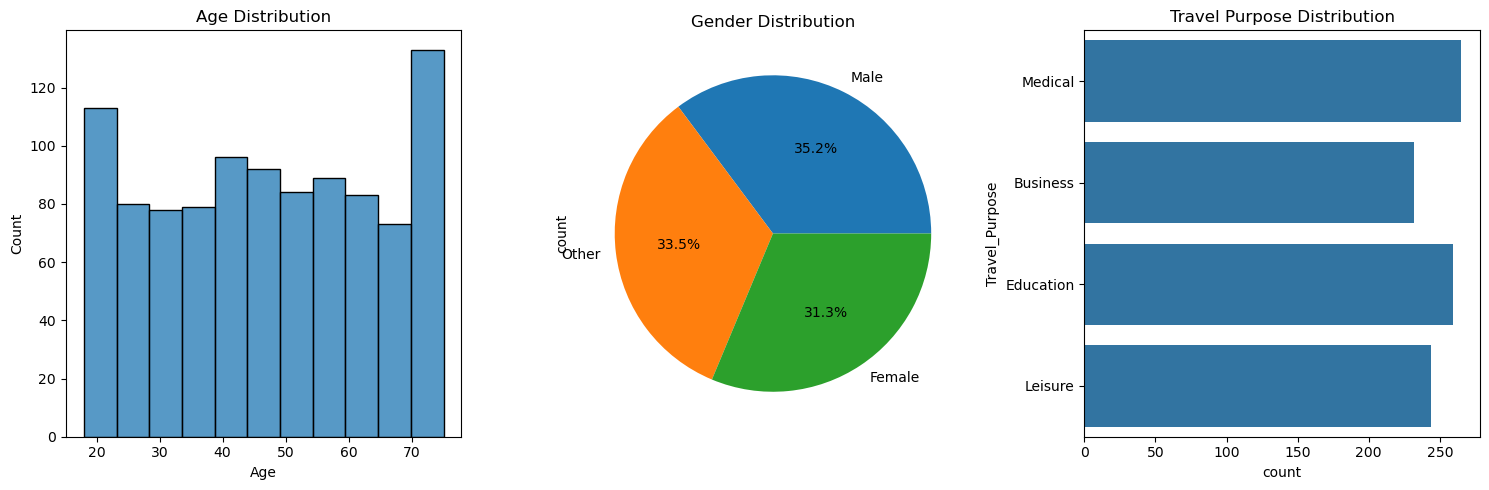

In [7]:
# 1. Visitor Demographics
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Age')
plt.title('Age Distribution')

# Gender Distribution
plt.subplot(1, 3, 2)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')

# Travel Purpose
plt.subplot(1, 3, 3)
sns.countplot(data=df, y='Travel_Purpose')
plt.title('Travel Purpose Distribution')

plt.tight_layout()
plt.show()


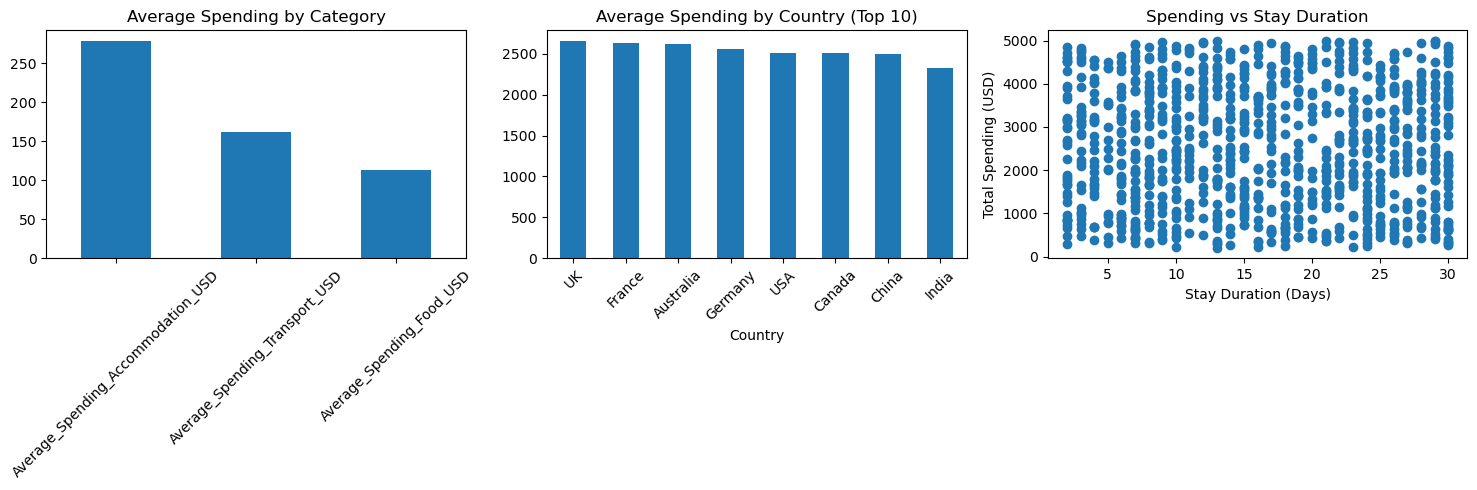

In [8]:
# 2. Spending Analysis
plt.figure(figsize=(15, 5))

# Average spending by category
spending_cols = ['Average_Spending_Accommodation_USD', 
                'Average_Spending_Transport_USD',
                'Average_Spending_Food_USD']
avg_spending = df[spending_cols].mean()

plt.subplot(1, 3, 1)
avg_spending.plot(kind='bar')
plt.title('Average Spending by Category')
plt.xticks(rotation=45)

# Spending by Country
plt.subplot(1, 3, 2)
country_spending = df.groupby('Country')['Spending_USD'].mean().sort_values(ascending=False).head(10)
country_spending.plot(kind='bar')
plt.title('Average Spending by Country (Top 10)')
plt.xticks(rotation=45)

# Spending vs Duration
plt.subplot(1, 3, 3)
plt.scatter(df['Stay_Duration_Days'], df['Spending_USD'])
plt.xlabel('Stay Duration (Days)')
plt.ylabel('Total Spending (USD)')
plt.title('Spending vs Stay Duration')

plt.tight_layout()
plt.show()


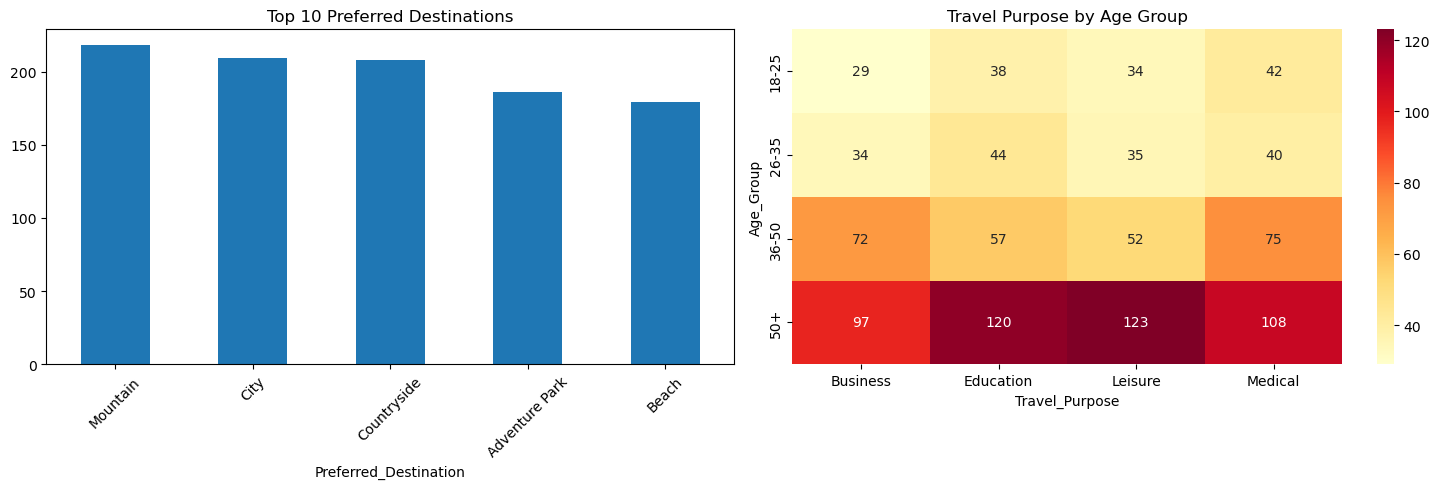

In [9]:
# 3. Destination Analysis
plt.figure(figsize=(15, 5))

# Popular destinations
plt.subplot(1, 2, 1)
df['Preferred_Destination'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Preferred Destinations')
plt.xticks(rotation=45)

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], 
                        bins=[0, 25, 35, 50, 100], 
                        labels=['18-25', '26-35', '36-50', '50+'])

# Destination vs Age Group heatmap
plt.subplot(1, 2, 2)
heatmap_data = pd.crosstab(df['Age_Group'], df['Travel_Purpose'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Travel Purpose by Age Group')

plt.tight_layout()
plt.show()


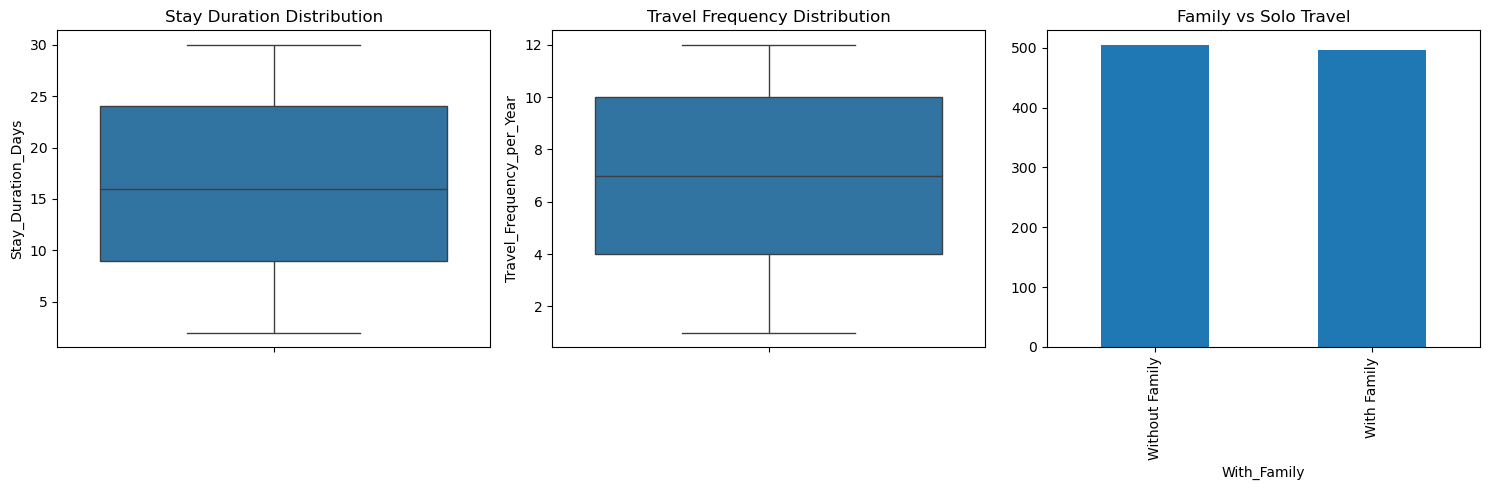

In [10]:
# 4. Travel Patterns
plt.figure(figsize=(15, 5))

# Stay Duration Distribution
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='Stay_Duration_Days')
plt.title('Stay Duration Distribution')

# Travel Frequency
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Travel_Frequency_per_Year')
plt.title('Travel Frequency Distribution')

# Family Travel
plt.subplot(1, 3, 3)
df['With_Family'].value_counts().plot(kind='bar')
plt.title('Family vs Solo Travel')

plt.tight_layout()
plt.show()

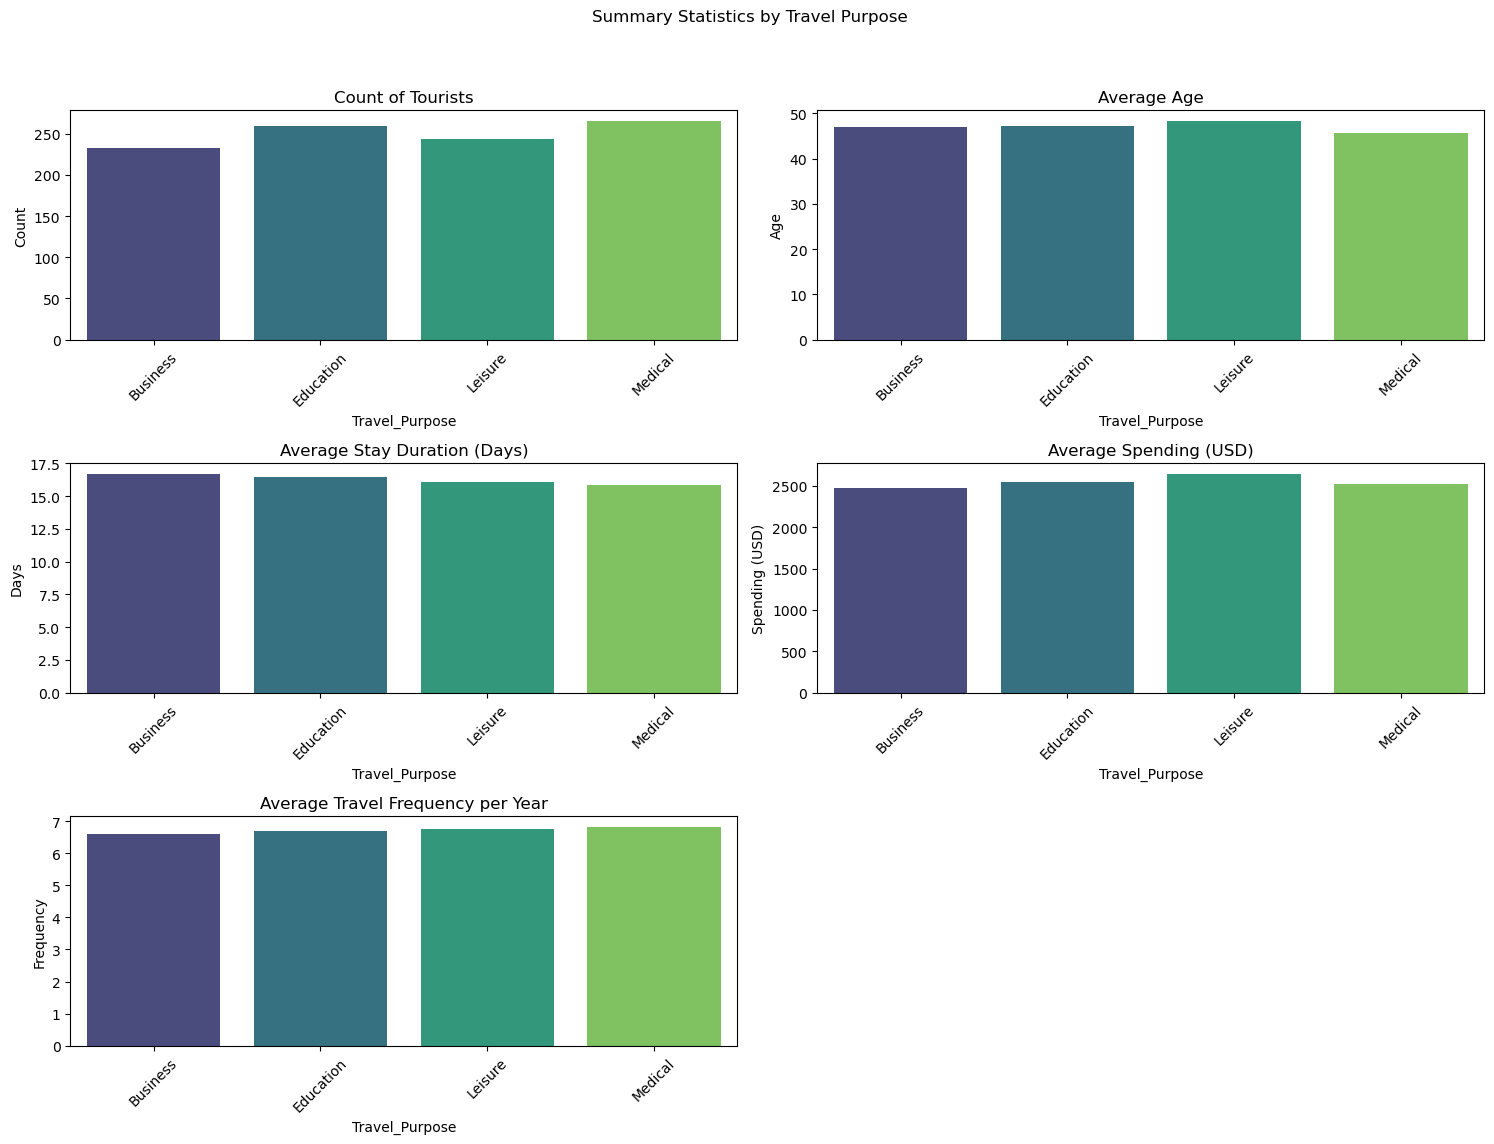

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Summary Statistics by Travel Purpose')

sns.barplot(data=summary_stats, x='Travel_Purpose', y='Count', hue='Travel_Purpose', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Count of Tourists')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticks(range(len(summary_stats['Travel_Purpose'])))  # Set fixed tick positions
axes[0, 0].set_xticklabels(summary_stats['Travel_Purpose'], rotation=45)  # Apply labels

sns.barplot(data=summary_stats, x='Travel_Purpose', y='Avg_Age', hue='Travel_Purpose', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Average Age')
axes[0, 1].set_ylabel('Age')
axes[0, 1].set_xticks(range(len(summary_stats['Travel_Purpose'])))
axes[0, 1].set_xticklabels(summary_stats['Travel_Purpose'], rotation=45)

sns.barplot(data=summary_stats, x='Travel_Purpose', y='Avg_Stay_Duration', hue='Travel_Purpose', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Average Stay Duration (Days)')
axes[1, 0].set_ylabel('Days')
axes[1, 0].set_xticks(range(len(summary_stats['Travel_Purpose'])))
axes[1, 0].set_xticklabels(summary_stats['Travel_Purpose'], rotation=45)

sns.barplot(data=summary_stats, x='Travel_Purpose', y='Avg_Spending', hue='Travel_Purpose', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Average Spending (USD)')
axes[1, 1].set_ylabel('Spending (USD)')
axes[1, 1].set_xticks(range(len(summary_stats['Travel_Purpose'])))
axes[1, 1].set_xticklabels(summary_stats['Travel_Purpose'], rotation=45)

sns.barplot(data=summary_stats, x='Travel_Purpose', y='Avg_Travel_Frequency', hue='Travel_Purpose', ax=axes[2, 0], palette='viridis')
axes[2, 0].set_title('Average Travel Frequency per Year')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_xticks(range(len(summary_stats['Travel_Purpose'])))
axes[2, 0].set_xticklabels(summary_stats['Travel_Purpose'], rotation=45)

axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


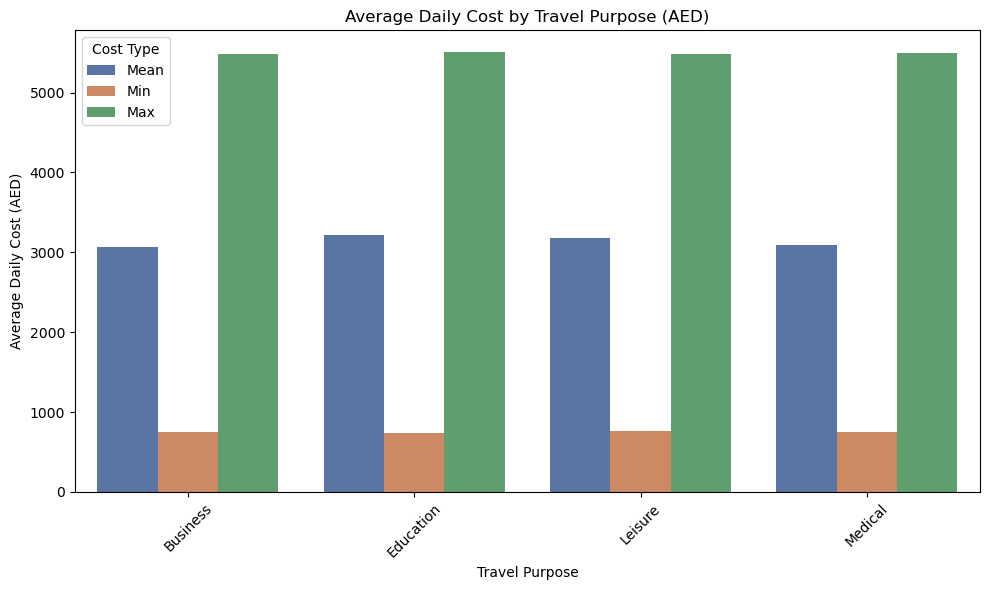

In [12]:
avg_daily_cost = df.groupby('Travel_Purpose').agg({
    'Average_Cost_Per_Day_AED': ['mean', 'min', 'max']
}).round(2)

avg_daily_cost.columns = ['Mean', 'Min', 'Max']
avg_daily_cost = avg_daily_cost.reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(data=avg_daily_cost.melt(id_vars="Travel_Purpose"), 
            x="Travel_Purpose", y="value", hue="variable",
            palette="deep")

plt.xlabel('Travel Purpose')
plt.ylabel('Average Daily Cost (AED)')
plt.title('Average Daily Cost by Travel Purpose (AED)')

plt.xticks(rotation=45)

plt.legend(title='Cost Type')
plt.tight_layout()
plt.show()
